## Importing dataset and splitting Dataset

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df = pd.read_csv('/kaggle/input/crop-soil-dataset/modified_crop_recommendation_dataset.csv')
eval_metrics=[["model","MAE","MSE","RMSE","R2"],0,0,0,0]

In [3]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['label'] = encoder.fit_transform(df['label'])
print(df.head())

    N   P   K  temperature   humidity        ph    rainfall  label  \
0  90  42  43    20.879744  82.002744  6.502985  202.935536     20   
1  85  58  41    21.770462  80.319644  7.038096  226.655537     20   
2  60  55  44    23.004459  82.320763  7.840207  263.964248     20   
3  74  35  40    26.491096  80.158363  6.980401  242.864034     20   
4  78  42  42    20.130175  81.604873  7.628473  262.717340     20   

   soil_moisture  
0      41.869007  
1      41.316917  
2      40.552052  
3      38.390942  
4      42.333610  


In [5]:
print(df.corr())

                      N         P         K  temperature  humidity        ph  \
N              1.000000 -0.231460 -0.140512     0.026504  0.190688  0.096683   
P             -0.231460  1.000000  0.736232    -0.127541 -0.118734 -0.138019   
K             -0.140512  0.736232  1.000000    -0.160387  0.190859 -0.169503   
temperature    0.026504 -0.127541 -0.160387     1.000000  0.205320 -0.017795   
humidity       0.190688 -0.118734  0.190859     0.205320  1.000000 -0.008483   
ph             0.096683 -0.138019 -0.169503    -0.017795 -0.008483  1.000000   
rainfall       0.059020 -0.063839 -0.053461    -0.030084  0.094423 -0.109069   
label         -0.031130 -0.491006 -0.346417     0.113606  0.193911 -0.012253   
soil_moisture -0.026504  0.127541  0.160387    -1.000000 -0.205320  0.017795   

               rainfall     label  soil_moisture  
N              0.059020 -0.031130      -0.026504  
P             -0.063839 -0.491006       0.127541  
K             -0.053461 -0.346417       0.1603

In [4]:


# Import modified dataset


# Split the data into features (X) and target (Y)
X = df.drop('soil_moisture', axis=1)  # drop the soil_moisture column
Y = df['soil_moisture']               # select only the soil_moisture column

# Split the data into training and testing sets for both X and Y
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# View the shape of the training and testing sets


## Support Vector Mechanism

Mean Absolute Error : 0.037140200107563706
Mean Squared Error: 0.0020069609559182334
Root Mean Squared Error: 0.044799117802901356
R-squared: 0.9997871801828719


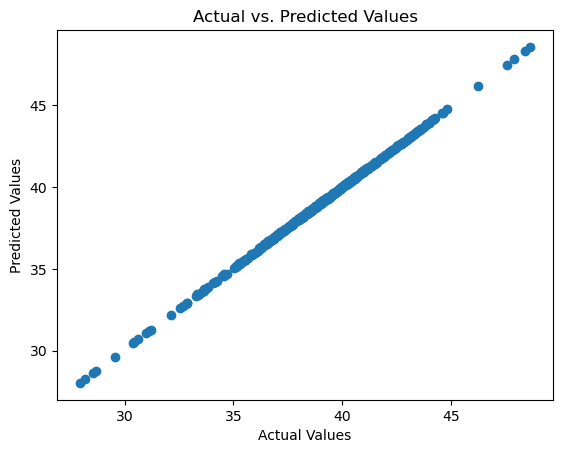

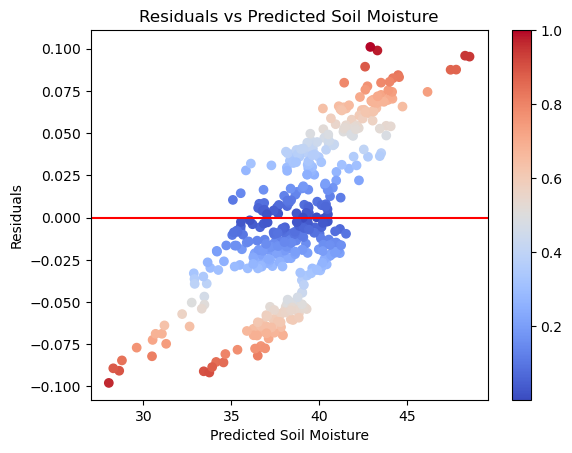

In [6]:
from sklearn.svm import SVR
svm = SVR(kernel="linear")
svm.fit(X_train, Y_train)

Y_pred = svm.predict(X_test)

mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)

# Print the evaluation metrics
print('Mean Absolute Error :', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R-squared:', r2)

err=["Support Vector Mechanism",mae,mse,rmse,r2]
eval_metrics[1]=err

plt.scatter(Y_test.values, Y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()


# Plot the residuals
residuals = Y_test.values - Y_pred
cmap = plt.cm.coolwarm
norm = plt.Normalize(vmin=0, vmax=np.abs(residuals).max())
plt.scatter(Y_pred, residuals, c=norm(np.abs(residuals)), cmap=cmap)
plt.xlabel('Predicted Soil Moisture')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Soil Moisture')
plt.axhline(y=0, color='r', linestyle='-') # add a horizontal line at y=0
plt.colorbar() # add a colorbar to show shading scale
plt.show()

## Gradient Boosting Regression

In [7]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb.fit(X_train, Y_train)

# Predict on test set and calculate mean squared error
y_pred = gb.predict(X_test)

mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)
err=["Gradient Boosting Regression",mae,mse,rmse,r2]
eval_metrics[2]=err
# Print the evaluation metrics
print('Mean Absolute Error :', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R-squared:', r2)

Mean Absolute Error : 0.037140200107563706
Mean Squared Error: 0.0020069609559182334
Root Mean Squared Error: 0.044799117802901356
R-squared: 0.9997871801828719


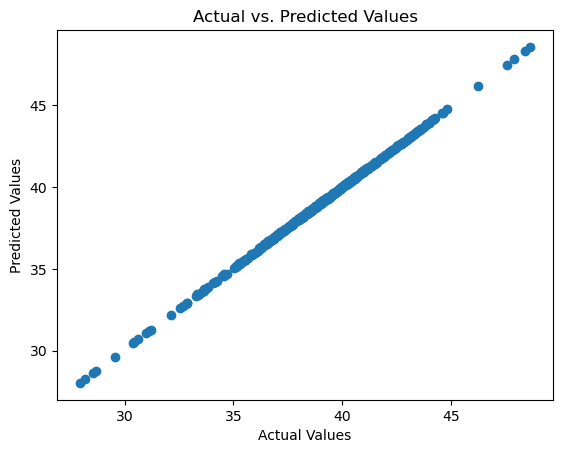

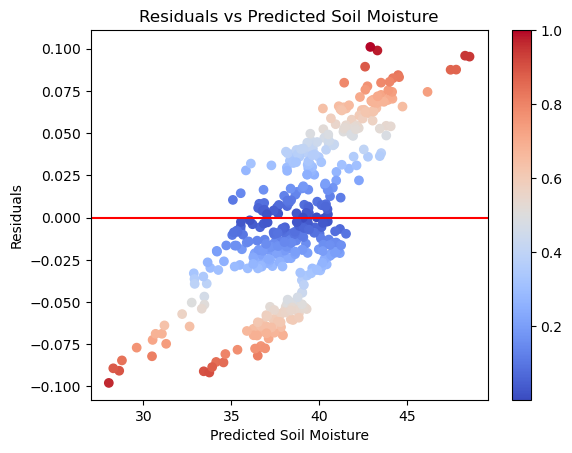

In [8]:
plt.scatter(Y_test.values, Y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()


# Plot the residuals
residuals = Y_test.values - Y_pred
cmap = plt.cm.coolwarm
norm = plt.Normalize(vmin=0, vmax=np.abs(residuals).max())
plt.scatter(Y_pred, residuals, c=norm(np.abs(residuals)), cmap=cmap)
plt.xlabel('Predicted Soil Moisture')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Soil Moisture')
plt.axhline(y=0, color='r', linestyle='-') # add a horizontal line at y=0
plt.colorbar() # add a colorbar to show shading scale
plt.show()

## Random Forest Regression

In [9]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, Y_train)

# Predict on the test set
Y_pred = rf_model.predict(X_test)
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)

err=["Random Forest Regression",mae,mse,rmse,r2]
eval_metrics[3]=err

# Print the evaluation metrics
print('Mean Absolute Error :', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R-squared:', r2)

Mean Absolute Error : 0.009304741077273889
Mean Squared Error: 0.0008755903086463034
Root Mean Squared Error: 0.02959037527045413
R-squared: 0.9999071516718769


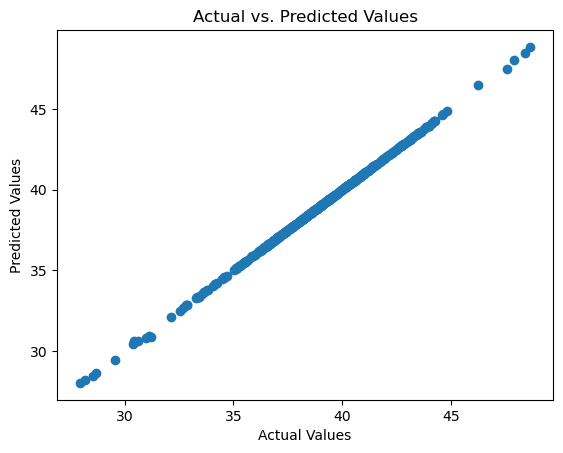

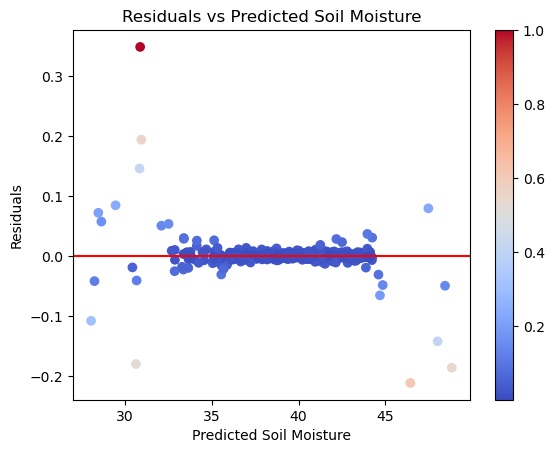

In [10]:
plt.scatter(Y_test.values, Y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()


# Plot the residuals
residuals = Y_test.values - Y_pred
cmap = plt.cm.coolwarm
norm = plt.Normalize(vmin=0, vmax=np.abs(residuals).max())
plt.scatter(Y_pred, residuals, c=norm(np.abs(residuals)), cmap=cmap)
plt.xlabel('Predicted Soil Moisture')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Soil Moisture')
plt.axhline(y=0, color='r', linestyle='-') # add a horizontal line at y=0
plt.colorbar() # add a colorbar to show shading scale
plt.show()

## Feedforward Neural Network

In [11]:
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras import backend as K
import keras
from keras.optimizers import Adam

adam = Adam(learning_rate=10**-6, decay=10**-9)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
Y_train_scaled = scaler.fit_transform(np.array(Y_train).reshape(-1, 1))
Y_test_scaled = scaler.fit_transform(np.array(Y_test).reshape(-1, 1))

# Build the model
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer=adam)


# Train the model
history = model.fit(X_train_scaled, Y_train_scaled, 
                    epochs=10000, 
                    batch_size=16, 
                    validation_data=(X_test_scaled, Y_test_scaled),
                    verbose=1)



Epoch 1/100
110/110 [==============================] - 1s 4ms/step - loss: 1.4254 - val_loss: 1.4147
Epoch 2/100
110/110 [==============================] - 0s 2ms/step - loss: 1.4218 - val_loss: 1.4113
Epoch 3/100
110/110 [==============================] - 0s 2ms/step - loss: 1.4182 - val_loss: 1.4079
Epoch 4/100
110/110 [==============================] - 0s 2ms/step - loss: 1.4146 - val_loss: 1.4045
Epoch 5/100
110/110 [==============================] - 0s 2ms/step - loss: 1.4111 - val_loss: 1.4012
Epoch 6/100
110/110 [==============================] - 0s 2ms/step - loss: 1.4076 - val_loss: 1.3978
Epoch 7/100
110/110 [==============================] - 0s 2ms/step - loss: 1.4041 - val_loss: 1.3945
Epoch 8/100
110/110 [==============================] - 0s 2ms/step - loss: 1.4006 - val_loss: 1.3913
Epoch 9/100
110/110 [==============================] - 0s 2ms/step - loss: 1.3971 - val_loss: 1.3880
Epoch 10/100
110/110 [==============================] - 0s 2ms/step - loss: 1.3937 - val_lo

In [12]:
# from tensorflow.keras.models import load_model

# # Load the entire model from a HDF5 file
# model = load_model('/kaggle/working/FNN.h5')

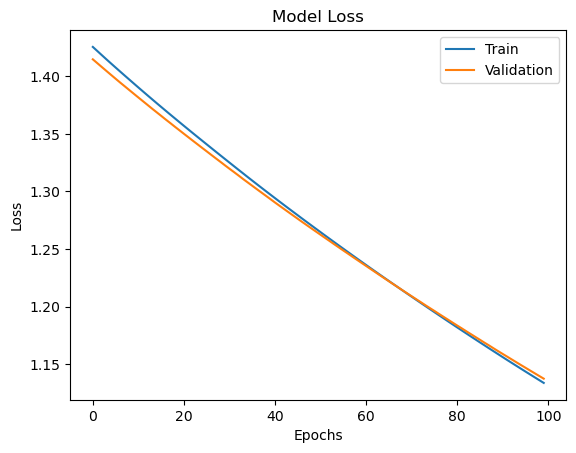

In [13]:
history.params
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [14]:
score = model.evaluate(X_test_scaled, Y_test_scaled, verbose=0)
print('Test loss:', score)
Y_pred = model.predict(X_test_scaled)
# print('Predictions:', predictions)

mae = mean_absolute_error(Y_test_scaled, Y_pred)
mse = mean_squared_error(Y_test_scaled, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test_scaled, Y_pred)

err=["Feedforward Neural Network",mae,mse,rmse,r2]
eval_metrics[4]=err

# Print the evaluation metrics
print('Mean Absolute Error :', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R-squared:', r2)

Test loss: 1.137494683265686
14/14 [==============================] - 0s 1ms/step
Mean Absolute Error : 0.8055941922856685
Mean Squared Error: 1.1374946792253986
Root Mean Squared Error: 1.0665339559645528
R-squared: -0.13749467922539882


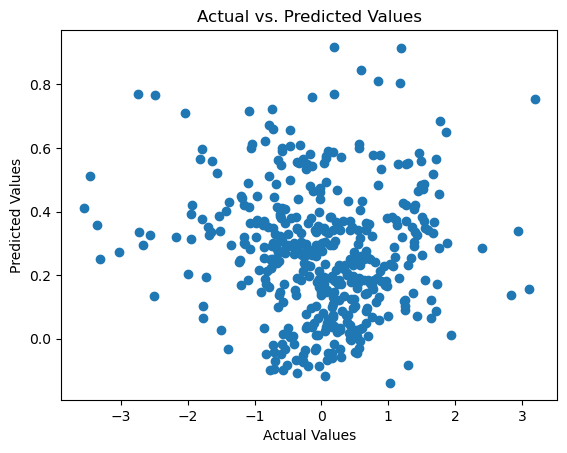

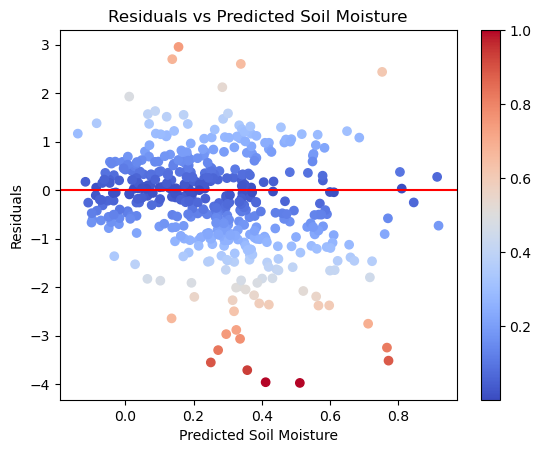

In [15]:
plt.scatter(Y_test_scaled, Y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

residuals = Y_test_scaled - Y_pred
cmap = plt.cm.coolwarm
norm = plt.Normalize(vmin=0, vmax=np.abs(residuals).max())
plt.scatter(Y_pred, residuals, c=norm(np.abs(residuals)), cmap=cmap)
plt.xlabel('Predicted Soil Moisture')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Soil Moisture')
plt.axhline(y=0, color='r', linestyle='-') # add a horizontal line at y=0
plt.colorbar() # add a colorbar to show shading scale
plt.show()

In [16]:
from tabulate import tabulate
print(tabulate(eval_metrics,headers="firstrow"))

model                                MAE         MSE       RMSE         R2
----------------------------  ----------  ----------  ---------  ---------
Support Vector Mechanism      0.0371402   0.00200696  0.0447991   0.999787
Gradient Boosting Regression  0.0371402   0.00200696  0.0447991   0.999787
Random Forest Regression      0.00930474  0.00087559  0.0295904   0.999907
Feedforward Neural Network    0.805594    1.13749     1.06653    -0.137495


## Firebase Connect

In [11]:
!pip install firebase_admin

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.5/119.5 kB 3.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 283.7/283.7 kB 11.5 MB/s eta 0:00:00


In [12]:
import firebase_admin
from firebase_admin import credentials, db

cred = credentials.Certificate("/kaggle/input/crop-soil-dataset/enthalpy2-1c38d-firebase-adminsdk-mlg8s-4639a6aaf2.json")
firebase_admin.initialize_app(cred, {
    'databaseURL': 'https://enthalpy2-1c38d-default-rtdb.asia-southeast1.firebasedatabase.app'
})

In [ ]:
from firebase_admin import db
import time

while(True):
    ref = db.reference('/')
    users_ref = ref.child('test')
    users = users_ref.get()
    # data = {'N': df['N'].mean(),
    #         'P': df['P'].mean(),
    #         'K': df['K'].mean(),
    #        "temperature": users["temperature_in_C"],
    #        "humidity": users["humidity"],
    #        "ph": users["phValue"],
    #        "rainfall": df["rainfall"].mean(),
    #        "label": 15}

    # # create the dataframe
    # df [0]= pd.DataFrame(data)
    print(users)

    moist = rf_model.predict(pd.DataFrame({"N": [df["N"].mean()],"P": [df['P'].mean()],"K": df['K'].mean(),
                                           "temperature":[users["temperature_in_C"]],"humidity": [users["humidity"]],
                                           "ph": [users["phValue"]],"rainfall":[df["rainfall"].mean()],"label":[15]
                                          }
                                         )
                          )
    motor=users["motor"]
    print(moist)
    moist=[200]
    if (motor==1):
        print("1",users["moisture"],moist[0]+10.00)
        if (users["moisture"]>moist[0]+10.00):
            print("0")
            users_ref.set({'motor': float(0),  'temperature_in_C' : users["temperature_in_C"] , 
                           "humidity": users["humidity"] ,"phValue": users["phValue"],
                           "heatindex_in_C": users["heatindex_in_C"], "moisture": users["moisture"]
                          }
                         )
    if (motor==0):
        print("0",users["moisture"],moist[0])
        if (users["moisture"]<moist[0]):
            print("1")
            users_ref.set({'motor': float(1),  'temperature_in_C' : users["temperature_in_C"] , 
                           "humidity": users["humidity"] ,"phValue": users["phValue"],
                           "heatindex_in_C": users["heatindex_in_C"], "moisture": users["moisture"]
                          })
    time.sleep(5)
    

{'heatindex_in_C': 30.9, 'humidity': 88.6, 'moisture': 110.69, 'motor': 1.0, 'phValue': 0, 'temperature_in_C': 30.9, 'temperature_in_F': 87.62}
[35.67703936]
1 110.69 210.0
{'heatindex_in_C': 30.9, 'humidity': 88.6, 'moisture': 110.69, 'motor': 1.0, 'phValue': 0, 'temperature_in_C': 30.9, 'temperature_in_F': 87.62}
[35.67703936]
1 110.69 210.0
{'heatindex_in_C': 31, 'humidity': 88.3, 'moisture': 111.19, 'motor': 1.0, 'phValue': 0, 'temperature_in_C': 31, 'temperature_in_F': 87.8}
[35.59443203]
1 111.19 210.0
{'heatindex_in_C': 31, 'humidity': 88.3, 'moisture': 111.19, 'motor': 1.0, 'phValue': 0, 'temperature_in_C': 31, 'temperature_in_F': 87.8}
[35.59443203]
1 111.19 210.0
{'heatindex_in_C': 31, 'humidity': 88.3, 'moisture': 111.19, 'motor': 1.0, 'phValue': 0, 'temperature_in_C': 31, 'temperature_in_F': 87.8}
[35.59443203]
1 111.19 210.0
{'heatindex_in_C': 31, 'humidity': 88.3, 'moisture': 111.19, 'motor': 1.0, 'phValue': 0, 'temperature_in_C': 31, 'temperature_in_F': 87.8}
[35.5944320